# Stroke Prediction Project
## 1. Problem Definition: 
- Goal: predict whether a patient is likely to get stroke
## 2. Feature Selection:
-  Choose feature to train ML model
- Need to use  'Feature Engineering' to identify Feature needed
## 3. Splitting datasets
- data: dataset
- x: data[feature]
- y: target variable Stroke

#### Questions to ask:
1) Male/Female who has more strokes.

2) People of which age group are more likely to get a stroke.

3) Is hypertension a cause? 

4) A person with heart disease is more likely to get a stroke (need confirmation).

5) Marriage may be a cause of strokes.

6) People working in private jobs may be the majority of people with strokes(mostly cause of stress).

7) People living in urban areas have more chances of getting stroke? (need to confirm)

8) Glucose levels are important and must be observed closely with other things.

9) BMI must be closely observed with age and gender.

10) People who smoke are more likely to get a stroke (need confirmation).



In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mydef

In [117]:
path ='./data/healthcare-dataset-stroke-data.csv'
raw_df = pd.read_csv(path)

In [118]:
df = raw_df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [119]:
move_df = df['age']
df = df.drop(['age'],axis =1)
df.insert(9, 'age', move_df)

In [120]:
id_df = df['id'] 
df = df.drop(['id'], axis= 1)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   object 
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   age                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [122]:
df.describe()

,hypertension,heart_disease,avg_glucose_level,bmi,age,stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,28.893237,43.226614,0.048728
std,0.296607,0.226063,45.283560,7.854067,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,1.000000,1.000000,271.740000,97.600000,82.000000,1.000000


## Observations : 
1) BMI contains missing values.

2) The average age is 43.

3) The average bmi is 29 (will change after imputation).

4) The minimum age is questionable.

5) Average glucose level is 106 (can be useful later).

In [123]:
mydef.draw_missing_data_table(df)

,Total,Percent
gender,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,0.039335
age,0,0.000000
smoking_status,0,0.000000


In [124]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= np.nan, strategy= 'mean')

In [125]:
filled_bmi = impute.fit_transform(df.iloc[:, 7:8].values)
filled_bmi

array([[36.6       ],
       [28.89323691],
       [32.5       ],
       ...,
       [30.6       ],
       [25.6       ],
       [26.2       ]])

In [126]:
df['bmi'] = pd.DataFrame(filled_bmi)
df['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

# Feature Engineering

In [127]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,age,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,67.0,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,61.0,never smoked,1
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,80.0,never smoked,1
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,49.0,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,79.0,never smoked,1


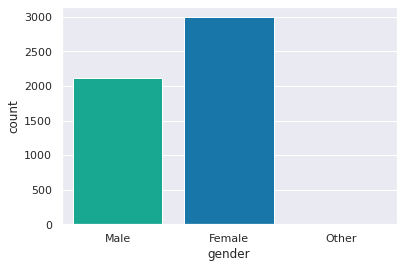

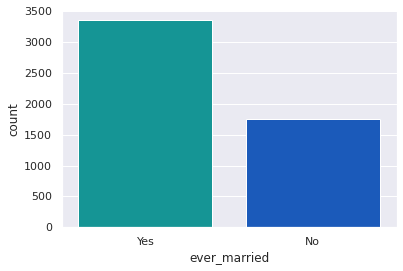

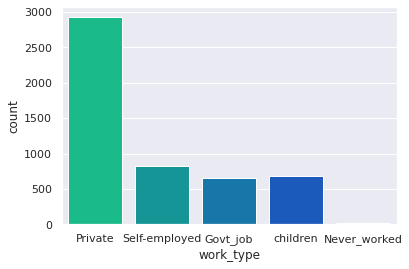

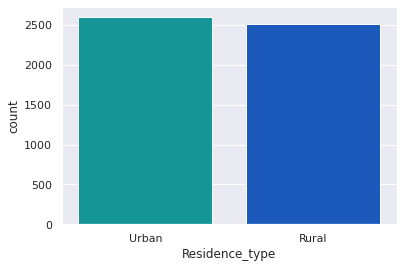

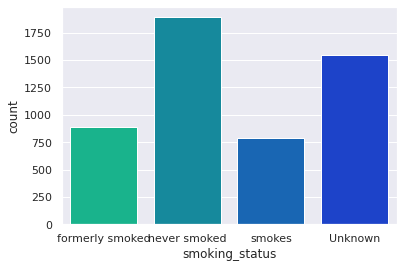

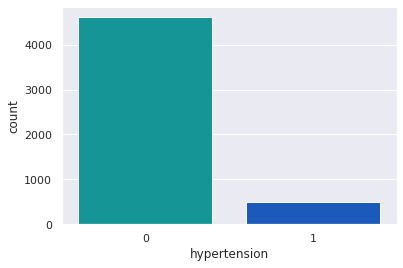

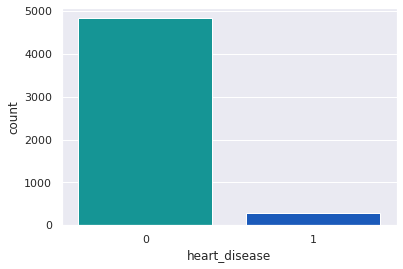

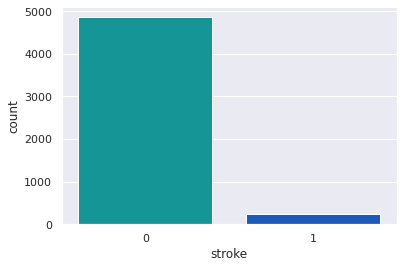

In [128]:
list_categorical_column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease', 'stroke']
for col in list_categorical_column:
    plt.figure()
    sns.countplot(data = df, x = col, palette='winter_r')

### Observations :
1) Females are more than male in our data. The Other category in gender is not visible as it contains only one value.

2) The number of people who are married are way more than unmarried people(makes sense as the distribution is between 0 and 60)

3) People seem to prefer working in private companies while the number of self-emplyed/ govt_job and children seems to be equal in number (children can be ignored). Unemployed people are extremely less.

4) Not a big difference between the population in urban and rural area.

5) The Unknown category reprsents that we do not know if a person smoked or not. If the size of unknown is too large then we will remove it from our model. Non-smokers are way more than people who smoked/used to smoke which is a good thing.
6) The number of people without hypertension are way less than people who has it.

7) The number of people with heart disease is extremely low.
8) Number of people with strokes are less than 1000 in number.

In [129]:
# Drop other in gender column
list_other_index = list(df[df['gender'] == 'Other'].index)
df = df.drop([index for index in list_other_index], axis= 0)

In [130]:
# Drop Never_worked in work_type column
list_Never_worked_index = list(df[df['work_type'] == 'Never_worked'].index)
df = df.drop([index for index in list_Never_worked_index], axis= 0)

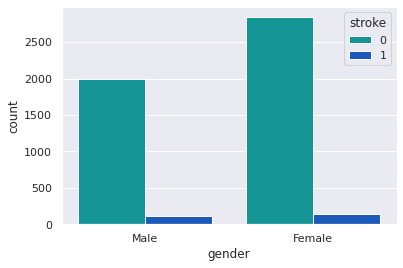

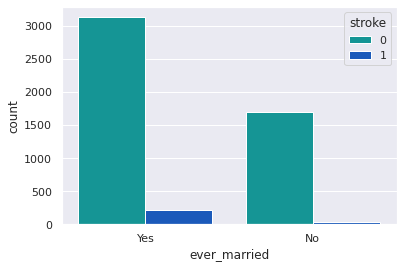

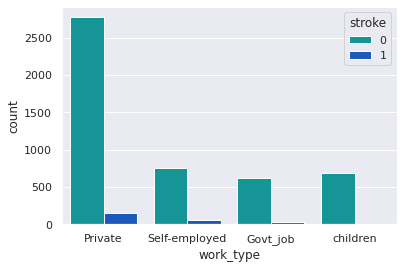

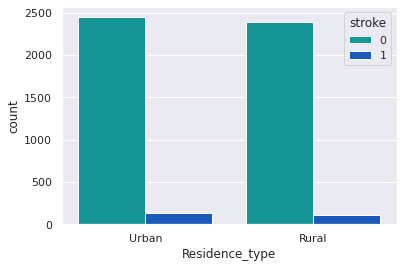

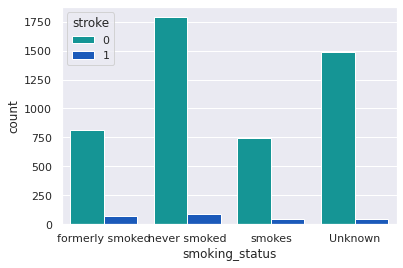

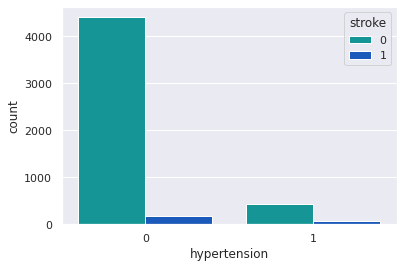

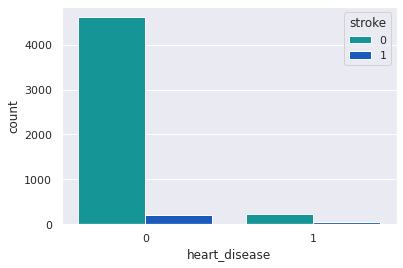

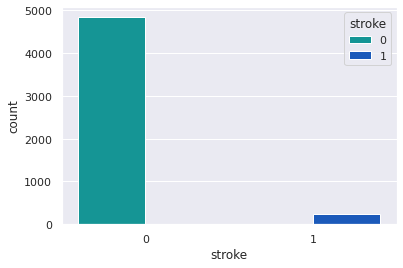

In [131]:
list_categorical_column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease', 'stroke']
for col in list_categorical_column:
    plt.figure()
    sns.countplot(data = df, x = col, hue ='stroke', palette='winter_r')

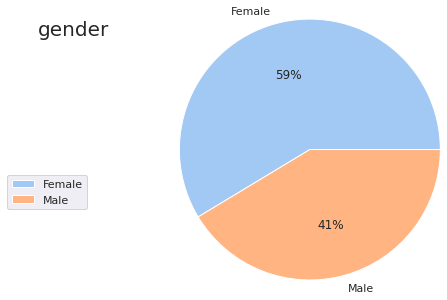

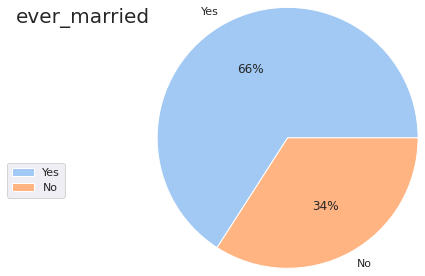

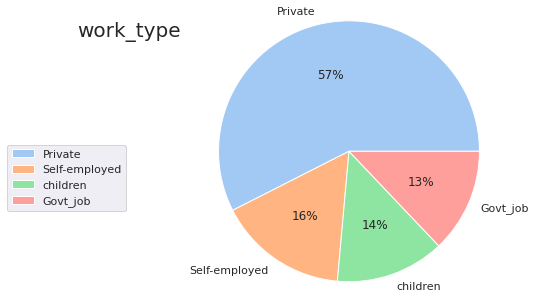

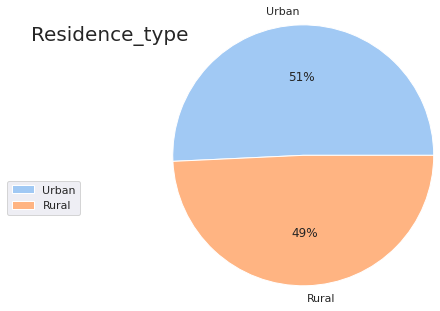

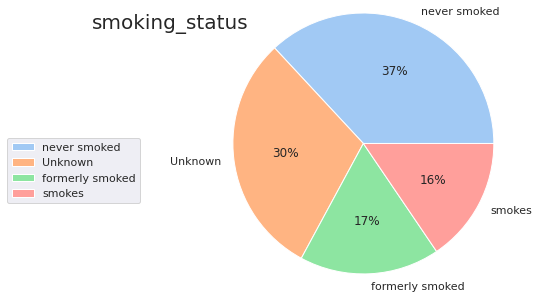

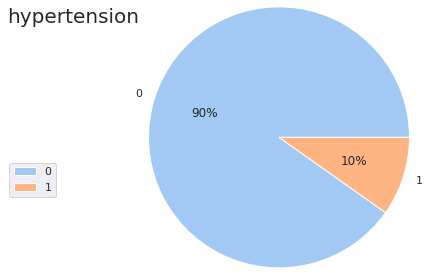

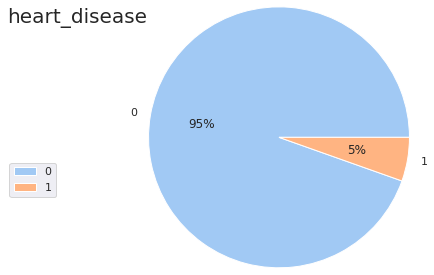

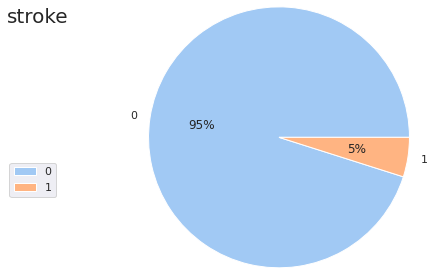

In [132]:
for col in list_categorical_column:
    data = df[col].value_counts()
    labels = list(data.index)
    name = df[col].name
    plt.figure()
    mydef.draw_pie(list(data.values),labels, name)

<Figure size 432x288 with 0 Axes>

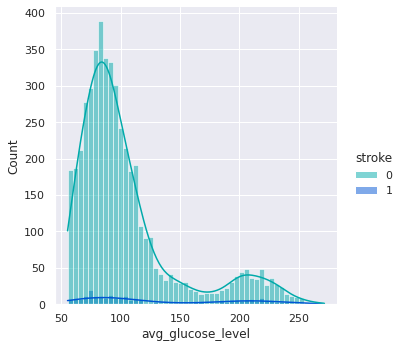

<Figure size 432x288 with 0 Axes>

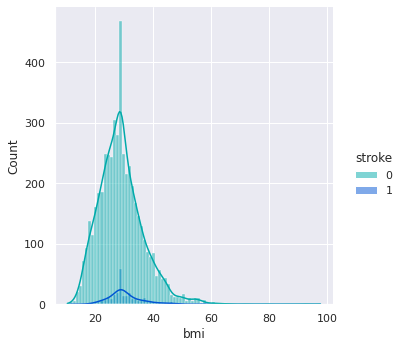

<Figure size 432x288 with 0 Axes>

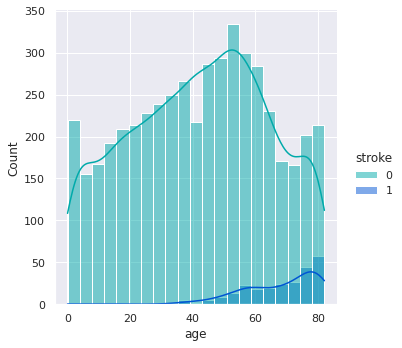

In [133]:
list_numerical_column = [ 'avg_glucose_level', 'bmi', 'age']
for col in list_numerical_column:
    plt.figure();
    sns.displot(data =df, x = col, hue ='stroke',  kde = True , palette='winter_r' );

### data Bias

## x: data[feature]
## y: target variable Stroke

In [134]:
x = df.iloc[ : , 0:-1].values
y =df.iloc[:, -1].values

In [135]:
print(x[0])
print(y)

['Male' 0 1 'Yes' 'Private' 'Urban' 228.69 36.6 67.0 'formerly smoked']
[1 1 1 ... 0 0 0]


# Encode Categorical Data
## 1: Encode  Independent variable (X)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5087 non-null   object 
 1   hypertension       5087 non-null   int64  
 2   heart_disease      5087 non-null   int64  
 3   ever_married       5087 non-null   object 
 4   work_type          5087 non-null   object 
 5   Residence_type     5087 non-null   object 
 6   avg_glucose_level  5087 non-null   float64
 7   bmi                5087 non-null   float64
 8   age                5087 non-null   float64
 9   smoking_status     5087 non-null   object 
 10  stroke             5087 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 605.9+ KB


In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# 0, 4, 5, 6, 9 is column index of gender, ever_married, work_type, Residence_type, smoking_status
list_column_index = [0, 3, 4, 5, 9]

gender = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [col for col in list_column_index] )], remainder = "passthrough")
x = (gender.fit_transform(x))

In [138]:
x[0]

array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
       0.0, 0, 1, 228.69, 36.6, 67.0], dtype=object)

## 2: Encode Dependent Variable (y)

In [139]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

# Using SMOTE to balance the Data


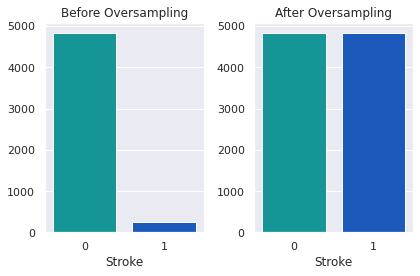

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1, palette='winter_r' );
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Stroke')

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x, y = sm.fit_resample(x, y)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax2, palette='winter_r' );
ax2.set_title("After Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

In [141]:
print(x[0])
x.shape

[  0.     1.     0.     1.     0.     1.     0.     0.     0.     1.
   0.     1.     0.     0.     0.     1.   228.69  36.6   67.  ]


(9676, 19)

## Splitting the dataset (x =data, y = output) into the Training set and Test set

In [142]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
# 80 % train and 20 % test
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2 )

In [143]:
print(x_train[0])
x_train.shape

[ 1.    0.    1.    0.    0.    1.    0.    0.    0.    1.    0.    0.
  0.    1.    0.    0.   78.04 32.4  40.  ]


(7740, 19)

## Feature Scaling by StandardScaler

In [144]:
from sklearn.preprocessing import StandardScaler

x_train[: , 18:] = StandardScaler().fit_transform(x_train[: , 18:])
x_train

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         7.80400000e+01,  3.24000000e+01, -6.77739668e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.73900000e+01,  3.80000000e+01,  9.08361825e-02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         7.68942325e+01,  2.75018527e+01,  2.54493994e-01],
       ...,
       [ 8.99957137e-01,  1.00042863e-01,  8.99957137e-01, ...,
         8.23930484e+01,  2.41400600e+01, -7.50068468e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.25380000e+02,  2.44000000e+01, -1.08463277e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.22754865e+01,  3.02330455e+01, -1.20275563e-01]])

In [145]:
x_test[: , 18:] = StandardScaler().fit_transform(x_test[: , 18:])
x_test

array([[ 3.93080320e-02,  9.60691968e-01,  0.00000000e+00, ...,
         2.39914686e+02,  2.72083326e+01,  1.11087901e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         8.51200000e+01,  3.25000000e+01, -1.02839243e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.71072012e+02,  2.73515792e+01,  1.06887065e+00],
       ...,
       [ 2.76294905e-01,  7.23705095e-01,  0.00000000e+00, ...,
         7.27713187e+01,  2.70183668e+01,  1.14745898e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         7.84003060e+01,  2.78894992e+01,  1.97594484e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.11319373e-01, ...,
         2.13480843e+02,  2.11677257e+01,  1.87383767e-01]])

# Train Module

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
dt_model = DecisionTreeRegressor(random_state =1)

In [147]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [148]:
y_preds = dt_model.predict(x_test)
y_preds

array([1., 0., 1., ..., 1., 1., 1.])

In [149]:
print(f"Accuracy Score : {round(accuracy_score(y_test, y_preds) * 100, 2)}%")

Accuracy Score : 93.23%
